<a href="https://colab.research.google.com/github/Jhow3D/Projetos---An-lise-de-dados/blob/main/Case_Unic%C3%B3rnios.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# PROJETO UNICÓRNIOS

In [ ]:
# importando libs:

import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore') # para ignorar alguns avisos.

In [ ]:
# Ler os dados 

Base_Dados = pd.read_csv("/content/Startups+in+2021+end.csv")

# Verificar a dimensão

Base_Dados.shape


(936, 8)

In [ ]:
# Primeiros registros
Base_Dados.head()

,Unnamed: 0,Company,Valuation ($B),Date Joined,Country,City,Industry,Select Investors
0,0,Bytedance,$140,4/7/2017,China,Beijing,Artificial intelligence,"Sequoia Capital China, SIG Asia Investments, S..."
1,1,SpaceX,$100.3,12/1/2012,United States,Hawthorne,Other,"Founders Fund, Draper Fisher Jurvetson, Rothen..."
2,2,Stripe,$95,1/23/2014,United States,San Francisco,Fintech,"Khosla Ventures, LowercaseCapital, capitalG"
3,3,Klarna,$45.6,12/12/2011,Sweden,Stockholm,Fintech,"Institutional Venture Partners, Sequoia Capita..."
4,4,Canva,$40,1/8/2018,Australia,Surry Hills,Internet software & services,"Sequoia Capital China, Blackbird Ventures, Mat..."


In [ ]:
# Colunas:

Base_Dados.columns

Index(['Unnamed: 0', 'Company', 'Valuation ($B)', 'Date Joined', 'Country',
       'City', 'Industry', 'Select Investors'],
      dtype='object')

In [ ]:
# Renomeando colunas: 

Base_Dados.rename( 
    columns={
       'Unnamed: 0': 'ID',
       'Company':'Empresa',
       'Valuation ($B)':'Valor ($)',
       'Date Joined':'Data de Adesão',
       'Country':'Pais',
       'City':'Cidade',
       'Industry':'Setor',
       'Select Investors':'Investidores'
    },inplace=True)

Base_Dados.columns

Index(['ID', 'Empresa', 'Valor ($)', 'Data de Adesão', 'Pais', 'Cidade',
       'Setor', 'Investidores'],
      dtype='object')

In [ ]:
# Verificar o tipo da informação: 

Base_Dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 936 entries, 0 to 935
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   ID              936 non-null    int64 
 1   Empresa         936 non-null    object
 2   Valor ($)       936 non-null    object
 3   Data de Adesão  936 non-null    object
 4   Pais            936 non-null    object
 5   Cidade          921 non-null    object
 6   Setor           936 non-null    object
 7   Investidores    935 non-null    object
dtypes: int64(1), object(7)
memory usage: 58.6+ KB


In [ ]:
# Verificando valores nulos.

Base_Dados.isnull().sum()

ID                 0
Empresa            0
Valor ($)          0
Data de Adesão     0
Pais               0
Cidade            15
Setor              0
Investidores       1
dtype: int64

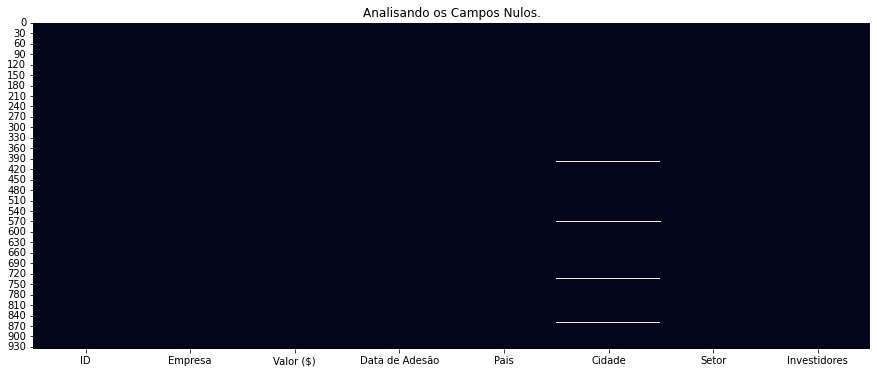

In [ ]:
# Verificação gráfica:
plt.figure(figsize=(15,6))
plt.title("Analisando os Campos Nulos.")
sns.heatmap(Base_Dados.isnull(),cbar=False);

In [ ]:
# Analisando campos únicos: 

Base_Dados.nunique()

ID                936
Empresa           935
Valor ($)         192
Data de Adesão    589
Pais               47
Cidade            239
Setor              17
Investidores      920
dtype: int64

In [ ]:
Base_Dados['Setor'].unique()

array(['Artificial intelligence', 'Other', 'Fintech',
       'Internet software & services',
       'Supply chain, logistics, & delivery',
       'Data management & analytics', 'Edtech',
       'E-commerce & direct-to-consumer', 'Hardware', 'Health',
       'Consumer & retail', 'Auto & transportation', 'Finttech',
       'Cybersecurity', 'Mobile & telecommunications', 'Travel',
       'Artificial Intelligence'], dtype=object)

In [ ]:
# Valores unicos - Rank

Base_Dados['Setor'].value_counts()

Fintech                                190
Internet software & services           167
E-commerce & direct-to-consumer        102
Artificial intelligence                 69
Health                                  63
Supply chain, logistics, & delivery     51
Other                                   51
Cybersecurity                           41
Mobile & telecommunications             37
Data management & analytics             36
Hardware                                32
Auto & transportation                   29
Edtech                                  27
Consumer & retail                       23
Travel                                  13
Artificial Intelligence                  4
Finttech                                 1
Name: Setor, dtype: int64

In [ ]:
Base_Dados['Setor'].value_counts(normalize = True) # Verificação em %

Fintech                                0.202991
Internet software & services           0.178419
E-commerce & direct-to-consumer        0.108974
Artificial intelligence                0.073718
Health                                 0.067308
Supply chain, logistics, & delivery    0.054487
Other                                  0.054487
Cybersecurity                          0.043803
Mobile & telecommunications            0.039530
Data management & analytics            0.038462
Hardware                               0.034188
Auto & transportation                  0.030983
Edtech                                 0.028846
Consumer & retail                      0.024573
Travel                                 0.013889
Artificial Intelligence                0.004274
Finttech                               0.001068
Name: Setor, dtype: float64

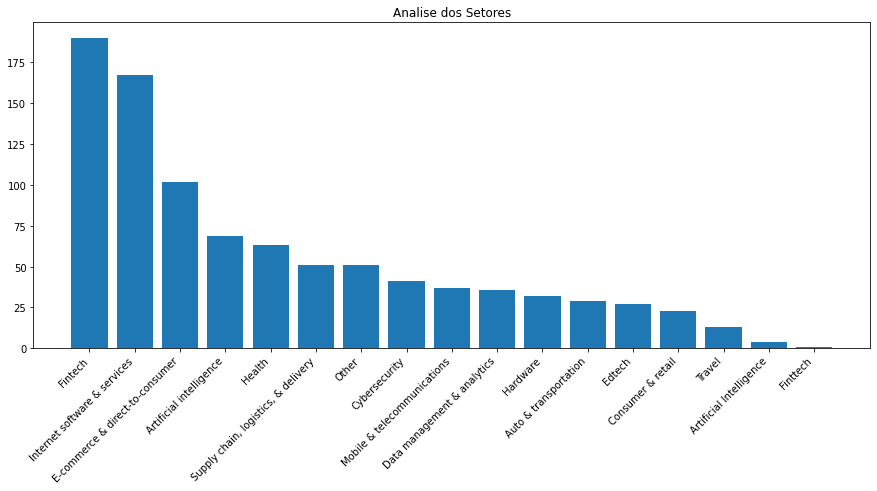

In [ ]:
plt.figure(figsize=(15,6))
plt.title('Analise dos Setores')
plt.bar(Base_Dados['Setor'].value_counts().index,Base_Dados['Setor'].value_counts());
plt.xticks(rotation=45,ha='right'); # Rotação dos valores do index 

In [ ]:
# Criando a analise de Paises:

Analise_paises = round(Base_Dados['Pais'].value_counts(normalize=True) * 100,1)

In [ ]:
Analise_paises

United States           51.0
China                   18.1
India                    5.4
United Kingdom           4.0
Germany                  2.5
Israel                   2.2
France                   2.0
Canada                   1.6
Brazil                   1.6
South Korea              1.2
Singapore                1.2
Hong Kong                0.7
Japan                    0.6
Australia                0.6
Mexico                   0.5
Netherlands              0.5
Indonesia                0.4
Spain                    0.4
Sweden                   0.4
Switzerland              0.4
Ireland                  0.3
United Arab Emirates     0.3
Norway                   0.3
Belgium                  0.2
Thailand                 0.2
Denmark                  0.2
Philippines              0.2
Finland                  0.2
Colombia                 0.2
South Africa             0.2
Turkey                   0.2
Austria                  0.2
Chile                    0.1
Malaysia                 0.1
Czech Republic

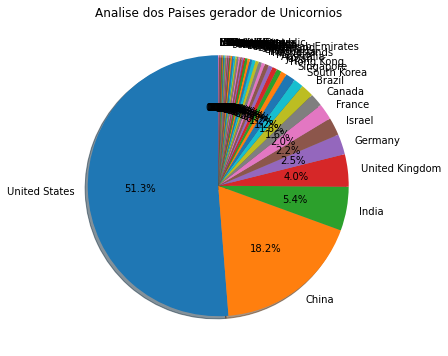

In [ ]:
# Criando Gráfico pizza:
plt.figure(figsize=(15,6))
plt.title("Analise dos Paises gerador de Unicornios")
plt.pie(
    Analise_paises,
    labels = Analise_paises.index,
    shadow = True,
    startangle = 90,
    autopct='%1.1f%%'
);


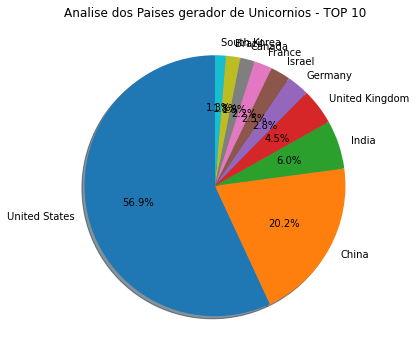

In [ ]:
# Criando Gráfico pizza, top10:
plt.figure(figsize=(15,6))
plt.title("Analise dos Paises gerador de Unicornios - TOP 10")
plt.pie(
    Analise_paises.head(10),
    labels = Analise_paises.index[0:10],
    shadow = True,
    startangle = 90,
    autopct='%1.1f%%'
);


In [ ]:
# Conversão para Data
Base_Dados['Data de Adesão'] = pd.to_datetime(Base_Dados['Data de Adesão'])
Base_Dados['Data de Adesão'].head()

0   2017-04-07
1   2012-12-01
2   2014-01-23
3   2011-12-12
4   2018-01-08
Name: Data de Adesão, dtype: datetime64[ns]

In [ ]:
# Extrair ano e mês:

Base_Dados['Mes'] = pd.DatetimeIndex(Base_Dados['Data de Adesão']).month
Base_Dados['Ano'] = pd.DatetimeIndex(Base_Dados['Data de Adesão']).year
Base_Dados.head()

,ID,Empresa,Valor ($),Data de Adesão,Pais,Cidade,Setor,Investidores,Mes,Ano
0,0,Bytedance,$140,2017-04-07,China,Beijing,Artificial intelligence,"Sequoia Capital China, SIG Asia Investments, S...",4,2017
1,1,SpaceX,$100.3,2012-12-01,United States,Hawthorne,Other,"Founders Fund, Draper Fisher Jurvetson, Rothen...",12,2012
2,2,Stripe,$95,2014-01-23,United States,San Francisco,Fintech,"Khosla Ventures, LowercaseCapital, capitalG",1,2014
3,3,Klarna,$45.6,2011-12-12,Sweden,Stockholm,Fintech,"Institutional Venture Partners, Sequoia Capita...",12,2011
4,4,Canva,$40,2018-01-08,Australia,Surry Hills,Internet software & services,"Sequoia Capital China, Blackbird Ventures, Mat...",1,2018


In [ ]:
# Tabela Analitica:

Analise_Agrupada = Base_Dados.groupby(by=['Pais','Ano','Mes','Empresa']).count()['ID'].reset_index() # Agrupando por Pais, Ano e mês e fazendo a contagem pelo ID.
Analise_Agrupada.head()

,Pais,Ano,Mes,Empresa,ID
0,Argentina,2021,8,Uala,1
1,Australia,2018,1,Canva,1
2,Australia,2019,3,Airwallex,1
3,Australia,2021,5,SafetyCulture,1
4,Australia,2021,7,Culture Amp,1


In [ ]:
# Fazendo um filtro dentro da tabela agrupada do País Brasil.
Analise_Agrupada.loc[
    Analise_Agrupada['Pais'] == 'Brazil'
]

,Pais,Ano,Mes,Empresa,ID
12,Brazil,2018,3,Nubank,1
13,Brazil,2018,7,Movile,1
14,Brazil,2018,11,iFood,1
15,Brazil,2019,6,Loggi,1
16,Brazil,2019,9,QuintoAndar,1
17,Brazil,2019,10,EBANX,1
18,Brazil,2019,12,Wildlife Studios,1
19,Brazil,2020,1,Loft,1
20,Brazil,2020,12,C6 Bank,1
21,Brazil,2020,12,Creditas,1


In [ ]:
# removando os $ dos valores.
# depois convertendo para valor númerico

Base_Dados['Valor ($)']= pd.to_numeric(Base_Dados['Valor ($)'].apply(lambda Linha:Linha.replace("$","")))
Base_Dados.head()

,ID,Empresa,Valor ($),Data de Adesão,Pais,Cidade,Setor,Investidores,Mes,Ano
0,0,Bytedance,140.0,2017-04-07,China,Beijing,Artificial intelligence,"Sequoia Capital China, SIG Asia Investments, S...",4,2017
1,1,SpaceX,100.3,2012-12-01,United States,Hawthorne,Other,"Founders Fund, Draper Fisher Jurvetson, Rothen...",12,2012
2,2,Stripe,95.0,2014-01-23,United States,San Francisco,Fintech,"Khosla Ventures, LowercaseCapital, capitalG",1,2014
3,3,Klarna,45.6,2011-12-12,Sweden,Stockholm,Fintech,"Institutional Venture Partners, Sequoia Capita...",12,2011
4,4,Canva,40.0,2018-01-08,Australia,Surry Hills,Internet software & services,"Sequoia Capital China, Blackbird Ventures, Mat...",1,2018


In [ ]:
# Tabela analitica: 

Base_Dados.groupby(by=['Pais']).sum()['Valor ($)'].reset_index()


,Pais,Valor ($)
0,Argentina,2.45
1,Australia,50.60
2,Austria,5.81
3,Belgium,7.55
4,Bermuda,1.60
5,Brazil,61.05
6,Canada,37.73
7,Chile,1.50
8,China,569.48
9,Colombia,6.40


In [ ]:
# Tabela analitica: 

Analise_Paises = Base_Dados.groupby(by=['Pais']).sum()['Valor ($)'].reset_index()  
Analise_Paises.head()

,Pais,Valor ($)
0,Argentina,2.45
1,Australia,50.60
2,Austria,5.81
3,Belgium,7.55
4,Bermuda,1.60


In [ ]:
# Ordenando o agrupamento pelo valor:

Analise_Paises.sort_values('Valor ($)',ascending=False) 

,Pais,Valor ($)
44,United States,1604.03
8,China,569.48
43,United Kingdom,150.29
18,India,148.45
16,Germany,66.63
5,Brazil,61.05
38,Sweden,58.08
1,Australia,50.60
22,Israel,43.82
17,Hong Kong,41.45


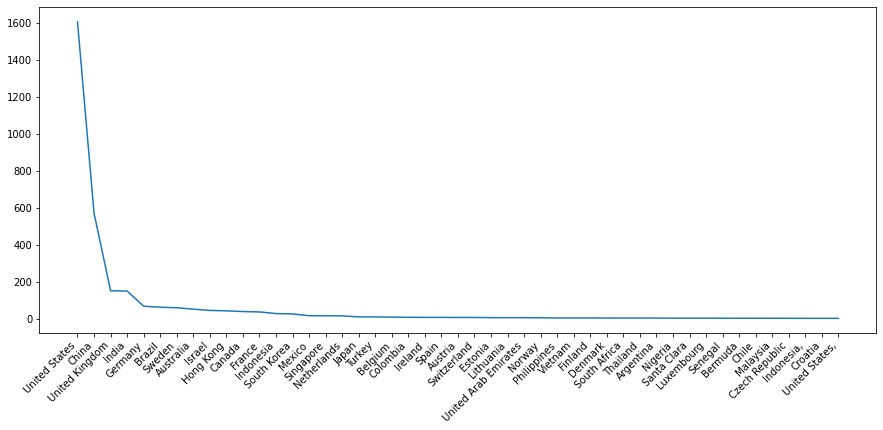

In [ ]:
Analise_Valor = Analise_Paises.sort_values('Valor ($)',ascending=False)

plt.figure(figsize=(15,6))
plt.plot(Analise_Valor['Pais'],Analise_Valor['Valor ($)'])
plt.xticks(rotation=45,ha='right');
